<a href="https://colab.research.google.com/github/19003934-UHI/Data_Analytics/blob/main/Assignment1_Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression Model 



In [ ]:
# For data frames
import pandas as pd
# For fast calculations
import numpy as np
# Create data frame from dataset
df = pd.read_csv("https://raw.githubusercontent.com/19003934-UHI/Data_Analytics/main/bquxjob_49d5e1e3_1872d26a08d.csv", index_col=0,)

# Print out data
df[:10]

,year,mo,da,collision_date,temp,dewp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
day,,,,,,,,,,,,,,,,
7,2018,9,23,2018-09-23,59.8,50.2,10.0,3.0,5.1,999.9,78.1,53.1,0.00,999.9,0,475
4,2018,12,20,2018-12-20,38.6,34.4,9.6,5.0,7.0,999.9,48.0,21.0,0.00,999.9,0,806
2,2013,11,5,2013-11-05,43.5,30.4,10.0,3.9,7.0,999.9,50.0,37.9,0.00,999.9,0,510
3,2012,7,11,2012-07-11,77.1,62.0,10.0,1.9,7.0,999.9,84.0,64.9,0.00,999.9,0,565
4,2012,8,9,2012-08-09,78.2,69.6,9.3,2.3,7.0,15.0,88.0,61.0,0.00,999.9,0,581
4,2012,7,12,2012-07-12,77.4,60.2,10.0,2.3,7.0,999.9,88.0,57.0,0.00,999.9,0,577
2,2017,9,26,2017-09-26,65.9,65.3,2.6,3.4,7.0,999.9,77.0,59.0,0.12,999.9,1,656
1,2012,9,17,2012-09-17,66.5,48.0,10.0,2.2,7.0,999.9,77.0,48.2,0.00,999.9,0,452
4,2020,9,10,2020-09-10,70.8,69.5,0.8,4.4,7.0,999.9,77.0,66.9,0.00,999.9,1,347


In [ ]:
# Converting data to include indexing for easier manipulation, done for each year between 2012 and 2020.
print(2012)
collisions2012temp = df[df['year'] == 2012]
dayofyear = range(1, len(collisions2012temp)+1)
dayindex = range(1, len(collisions2012temp)+1)
collisions2012 = pd.concat([pd.DataFrame(dayindex), pd.DataFrame(dayofyear), collisions2012temp.reset_index(drop=True)], axis=1)
collisions2012temp[:10]

2012


,year,mo,da,collision_date,temp,dewp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
day,,,,,,,,,,,,,,,,
3,2012,7,11,2012-07-11,77.1,62.0,10.0,1.9,7.0,999.9,84.0,64.9,0.0,999.9,0,565
4,2012,8,9,2012-08-09,78.2,69.6,9.3,2.3,7.0,15.0,88.0,61.0,0.0,999.9,0,581
4,2012,7,12,2012-07-12,77.4,60.2,10.0,2.3,7.0,999.9,88.0,57.0,0.0,999.9,0,577
1,2012,9,17,2012-09-17,66.5,48.0,10.0,2.2,7.0,999.9,77.0,48.2,0.0,999.9,0,452
5,2012,8,24,2012-08-24,77.3,60.9,9.3,2.0,7.0,999.9,87.1,66.0,0.0,999.9,0,601
5,2012,7,13,2012-07-13,78.9,60.7,9.9,3.0,7.0,999.9,87.1,63.0,0.0,999.9,0,603
5,2012,10,26,2012-10-26,60.8,53.4,10.0,1.5,7.0,999.9,64.9,39.2,0.0,999.9,0,598
6,2012,7,28,2012-07-28,75.5,69.6,7.0,3.9,8.0,15.9,84.0,68.0,0.0,999.9,1,513
7,2012,7,22,2012-07-22,72.5,59.4,10.0,2.0,8.0,999.9,82.0,54.0,0.0,999.9,0,498


In [ ]:
print(2013)
collisions2013temp = df[df['year'] == 2013]
dayofyear = range(1, len(collisions2013temp)+1)
dayindex = range(1, len(collisions2013temp)+1)
collisions2013 = pd.concat([pd.DataFrame(dayindex), pd.DataFrame(dayofyear), collisions2013temp.reset_index(drop=True)], axis=1)
collisions2013['NUM_COLLISIONS'].describe()

2013


count    365.000000
mean     558.175342
std       83.273922
min      257.000000
25%      505.000000
50%      558.000000
75%      613.000000
max      867.000000
Name: NUM_COLLISIONS, dtype: float64

In [ ]:
print(2014)
collisions2014temp = df[df['year'] == 2014]
dayofyear = range(1, len(collisions2014temp)+1)
dayindex = range(1, len(collisions2014temp)+1)
collisions2014 = pd.concat([pd.DataFrame(dayindex), pd.DataFrame(dayofyear), collisions2014temp.reset_index(drop=True)], axis=1)
collisions2014['NUM_COLLISIONS'].describe()

2014


count     424.000000
mean      564.257075
std        90.034285
min       303.000000
25%       512.750000
50%       567.500000
75%       620.250000
max      1161.000000
Name: NUM_COLLISIONS, dtype: float64

In [ ]:
print(2015)
collisions2015temp = df[df['year'] == 2015]
dayofyear = range(1, len(collisions2015temp)+1)
dayindex = range(1, len(collisions2015temp)+1)
collisions2015 = pd.concat([pd.DataFrame(dayindex), pd.DataFrame(dayofyear), collisions2015temp.reset_index(drop=True)], axis=1)
collisions2015['NUM_COLLISIONS'].describe()

2015


count    365.000000
mean     596.421918
std      102.801594
min      188.000000
25%      532.000000
50%      601.000000
75%      666.000000
max      961.000000
Name: NUM_COLLISIONS, dtype: float64

In [ ]:
print(2016)
collisions2016temp = df[df['year'] == 2016]
dayofyear = range(1, len(collisions2016temp)+1)
dayindex = range(1, len(collisions2016temp)+1)
collisions2016 = pd.concat([pd.DataFrame(dayindex), pd.DataFrame(dayofyear), collisions2016temp.reset_index(drop=True)], axis=1)
collisions2016['NUM_COLLISIONS'].describe()

2016


count    366.000000
mean     627.953552
std       97.433957
min      291.000000
25%      568.250000
50%      635.000000
75%      696.750000
max      872.000000
Name: NUM_COLLISIONS, dtype: float64

In [ ]:
print(2017)
collisions2017temp = df[df['year'] == 2017]
dayofyear = range(1, len(collisions2017temp)+1)
dayindex = range(1, len(collisions2017temp)+1)
collisions2017 = pd.concat([pd.DataFrame(dayindex), pd.DataFrame(dayofyear), collisions2017temp.reset_index(drop=True)], axis=1)
collisions2017['NUM_COLLISIONS'].describe()

2017


count    365.000000
mean     632.895890
std      102.339261
min      333.000000
25%      570.000000
50%      636.000000
75%      700.000000
max      999.000000
Name: NUM_COLLISIONS, dtype: float64

In [ ]:
print(2018)
collisions2018temp = df[df['year'] == 2018]
dayofyear = range(1, len(collisions2018temp)+1)
dayindex = range(1, len(collisions2018temp)+1)
collisions2018 = pd.concat([pd.DataFrame(dayindex), pd.DataFrame(dayofyear), collisions2018temp.reset_index(drop=True)], axis=1)
collisions2018['NUM_COLLISIONS'].describe()

2018


count     365.000000
mean      634.421918
std        99.876531
min       328.000000
25%       562.000000
50%       634.000000
75%       706.000000
max      1065.000000
Name: NUM_COLLISIONS, dtype: float64

In [ ]:
print(2019)
collisions2019temp = df[df['year'] == 2019]
dayofyear = range(1, len(collisions2019temp)+1)
dayindex = range(1, len(collisions2019temp)+1)
collisions2019 = pd.concat([pd.DataFrame(dayindex), pd.DataFrame(dayofyear), collisions2019temp.reset_index(drop=True)], axis=1)
collisions2019['NUM_COLLISIONS'].describe()

2019


count    365.000000
mean     579.413699
std       88.947085
min      264.000000
25%      522.000000
50%      589.000000
75%      641.000000
max      803.000000
Name: NUM_COLLISIONS, dtype: float64

In [ ]:
print(2020)
collisions2020temp = df[df['year'] == 2020]
dayofyear = range(1, len(collisions2020temp)+1)
dayindex = range(1, len(collisions2020temp)+1)
collisions2020 = pd.concat([pd.DataFrame(dayindex), pd.DataFrame(dayofyear), collisions2020temp.reset_index(drop=True)], axis=1)
collisions2020['NUM_COLLISIONS'].describe()

2020


count    366.000000
mean     308.510929
std      110.188996
min       94.000000
25%      242.250000
50%      301.000000
75%      348.000000
max      774.000000
Name: NUM_COLLISIONS, dtype: float64

In [ ]:
# Add years together into one dataset
collisions_2012_to_2020 = pd.concat([collisions2012, collisions2013, collisions2014, collisions2015, collisions2016, collisions2017, collisions2018, collisions2019, collisions2020], axis=0)
print(collisions_2012_to_2020.head())

df = collisions_2012_to_2020

   0  0  year  mo  da collision_date  temp  dewp  visib  wdsp  mxpsd   gust  \
0  1  1  2012   7  11     2012-07-11  77.1  62.0   10.0   1.9    7.0  999.9   
1  2  2  2012   8   9     2012-08-09  78.2  69.6    9.3   2.3    7.0   15.0   
2  3  3  2012   7  12     2012-07-12  77.4  60.2   10.0   2.3    7.0  999.9   
3  4  4  2012   9  17     2012-09-17  66.5  48.0   10.0   2.2    7.0  999.9   
4  5  5  2012   8  24     2012-08-24  77.3  60.9    9.3   2.0    7.0  999.9   

    max   min  prcp   sndp  fog  NUM_COLLISIONS  
0  84.0  64.9   0.0  999.9    0             565  
1  88.0  61.0   0.0  999.9    0             581  
2  88.0  57.0   0.0  999.9    0             577  
3  77.0  48.2   0.0  999.9    0             452  
4  87.1  66.0   0.0  999.9    0             601  


In [ ]:
# Imports for creating validation sets and linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

## Validation Sets

Before training a linear regression model, some validations sets will need to be created to find out which sets will be used for training. The variables found through the above analysis will be used.

MAX/MIN/DA/FOG vs. NUM_COLLISIONS

In [ ]:
X = df[['max', 'min', 'da', 'fog']]
Y = df['NUM_COLLISIONS']

Split the data into training and testing sets using the 'train_test_split()' function.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Split the data again, creating a validation set of 20% of the training data.

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [ ]:
model_max_min_da_fog = LinearRegression()
model_max_min_da_fog.fit(X_train, Y_train)
print("Intercept:", model_max_min_da_fog.intercept_)
print("Coefficients:", model_max_min_da_fog.coef_)

Intercept: 514.0362292517908
Coefficients: [ 1.21111082 -0.33105002 -0.70367072 -6.79773952]


In [ ]:
# Predict y-value with x-values
Y_pred = model_max_min_da_fog.predict(X_val)

In [ ]:
score = model_max_min_da_fog.score(X_val, Y_val)
print(f"R^2 score: {score:.4f}")

R^2 score: -0.0031


A mixture of all four variables provide a relatively high R2 score of 0.0033, hinting that some of the variables play a role in the number of collisions which occur. To find out which variables impact this number, further validation sets will be created.

MAX/MIN/DA vs. NUM_COLLISIONS

In [ ]:
X = df[['max', 'min', 'da']]
Y = df['NUM_COLLISIONS']

Split the data into training and testing sets using the 'train_test_split()' function.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Split the data again, creating a validation set of 20% of the training data.

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [ ]:
model_max_min_da = LinearRegression()
model_max_min_da.fit(X_train, Y_train)
print("Intercept:", model_max_min_da.intercept_)
print("Coefficients:", model_max_min_da.coef_)

Intercept: 514.0081308425891
Coefficients: [ 1.23034254 -0.39931252 -0.69155655]


In [ ]:
# Predict y-value with x-values
Y_pred = model_max_min_da.predict(X_val)

In [ ]:
score = model_max_min_da.score(X_val, Y_val)
print(f"R^2 score: {score:.4f}")

R^2 score: -0.0001


Removing the 'fog' variable pushes the correlation higher by 0.0004, proving that the max and min temperature play a role in the number of collisions. As stated earlier though, the day does not seem to affect the number of collisions which occur, so removing this may increase the R2 score.

MAX/MIN vs. NUM_COLLISIONS

In [ ]:
X = df[['max', 'min']]
Y = df['NUM_COLLISIONS']

Split the data into training and testing sets using the 'train_test_split()' function.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Split the data again, creating a validation set of 20% of the training data.

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [ ]:
model_max_min = LinearRegression()
model_max_min.fit(X_train, Y_train)
print("Intercept:", model_max_min.intercept_)
print("Coefficients:", model_max_min.coef_)

Intercept: 502.38911357759855
Coefficients: [ 1.26465772 -0.4311661 ]


In [ ]:
# Predict y-value with x-values
Y_pred = model_max_min.predict(X_val)

In [ ]:
score = model_max_min.score(X_val, Y_val)
print(f"R^2 score: {score:.4f}")

R^2 score: -0.0008


The R2 score plummeted to 0.0009 after removing the day variable. This could be due to instances of crashes occuring at high temperatures compared to lower temperatures. To get a more accurate R2 score, validation sets of both max and min temperatures will be created independent of each other.

MAX vs. NUM_COLLISIONS

In [ ]:
X = df[['max']]
Y = df['NUM_COLLISIONS']

Split the data into training and testing sets using the 'train_test_split()' function.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Split the data again, creating a validation set of 20% of the training data.

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

Intercept: 507.9329856859529
Coefficients: [0.85426852]


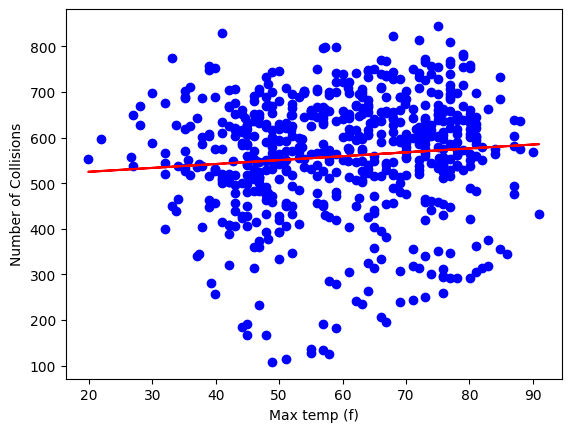

In [ ]:
model_max = LinearRegression()
model_max.fit(X_train, Y_train)
print("Intercept:", model_max.intercept_)
print("Coefficients:", model_max.coef_)

plt.scatter(X_test['max'], Y_test, color="blue")
plt.plot(X_test['max'], model_max.predict(X_test), color="red")
plt.xlabel("Max temp (f)")
plt.ylabel("Number of Collisions")
plt.show()

The above graph continues to show the increasing trend as found within the 'Analysis' section.

In [ ]:
# Predict y-value with x-values
Y_pred = model_max.predict(X_val)

In [ ]:
score = model_max.score(X_val, Y_val)
print(f"R^2 score: {score:.4f}")

R^2 score: -0.0020


Removing the 'min' variable has improved the R2 score by doubling it, further proving that the temperature on the day impacts the number of collisions occuring. Next, the opposite will be tested to see whether a minimum temperature will affect the number of collisions.

MIN vs. NUM_COLLISIONS

In [ ]:
X = df[['min']]
Y = df['NUM_COLLISIONS']

Split the data into training and testing sets using the 'train_test_split()' function.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Split the data again, creating a validation set of 20% of the training data.

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

Intercept: 527.6893719989168
Coefficients: [0.71323053]


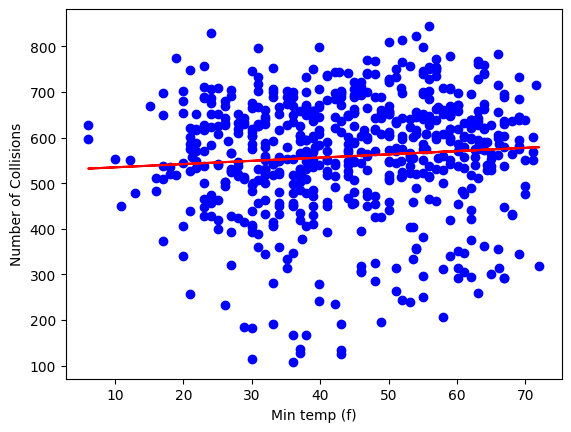

In [ ]:
model_min = LinearRegression()
model_min.fit(X_train, Y_train)
print("Intercept:", model_min.intercept_)
print("Coefficients:", model_min.coef_)

plt.scatter(X_test['min'], Y_test, color="blue")
plt.plot(X_test['min'], model_min.predict(X_test), color="red")
plt.xlabel("Min temp (f)")
plt.ylabel("Number of Collisions")
plt.show()

As with the graph for the max temperature, the upward trend continues in this graph. This makes sense due to the graph with the higher temperatures already continuing the trend established here.

In [ ]:
# Predict y-value with x-values
Y_pred = model_min.predict(X_val)

In [ ]:
score = model_min.score(X_val, Y_val)
print(f"R^2 score: {score:.4f}")

R^2 score: -0.0046


While not as high as the max temperature, the R2 score for the min temperature is showing a positive correlation with the number of collisions occuring. Since fog occurs at around 4 degrees, the fog variable only has an effect at lower temperatures. So, the two variables will be tested as a validation set.

MIN/FOG vs. NUM_COLLISIONS

In [ ]:
X = df[['min','fog']]
Y = df['NUM_COLLISIONS']

Split the data into training and testing sets using the 'train_test_split()' function.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Split the data again, creating a validation set of 20% of the training data.

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [ ]:
model_min_fog = LinearRegression()
model_min_fog.fit(X_train, Y_train)
print("Intercept:", model_min_fog.intercept_)
print("Coefficients:", model_min_fog.coef_)

Intercept: 527.1417596958632
Coefficients: [ 0.76402608 -6.79105177]


In [ ]:
# Predict y-value with x-values
Y_pred = model_min_fog.predict(X_val)

In [ ]:
score = model_min_fog.score(X_val, Y_val)
print(f"R^2 score: {score:.4f}")

R^2 score: -0.0074


A validation set of both min temperature and fog depth lower the score of the independent min temp by almost half. Due to the rarity of fog occuring and the circumstances needed for it to form, it is not surprising to find that the R2 score (and therefore the correlaton) to drop slightly.

Although stated earlier, that the day has no correlation between the number of crashes, predictions may be made that the day could play a role in collision numbers. This will be paired with max temperatures to find a correlation.

MAX/DA vs. NUM_COLLISIONS

In [ ]:
X = df[['max','da']]
Y = df['NUM_COLLISIONS']

Split the data into training and testing sets using the 'train_test_split()' function.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Split the data again, creating a validation set of 20% of the training data.

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [ ]:
model_max_da = LinearRegression()
model_max_da.fit(X_train, Y_train)
print("Intercept:", model_max_da.intercept_)
print("Coefficients:", model_max_da.coef_)

Intercept: 519.2561165241457
Coefficients: [ 0.85023144 -0.69857008]


In [ ]:
Y_pred = model_max_da.predict(X_val)


In [ ]:
score = model_max_da.score(X_val, Y_val)
print(f"R^2 score: {score:.4f}")

R^2 score: -0.0015


The R2 score jumped up quite signficantly when both variables were put together. The max temp on its own only score 0.0020, with it now increasing by around 250% to 0.0050. Perhaps the day of the week does play a role in the number of collisions with higher tempratures. This could be attributed to better weather making people want to travel more, therefore increasing the number of cars on the road an potientially increasing the number of collisions.

Although the same cannot be said for lower temperatures, perhaps min temperatures and the day can have a higher crash rate.

MIN/DA vs. NUM_COLLISIONS

In [ ]:
X = df[['min', 'da']]
Y = df['NUM_COLLISIONS']

Split the data into training and testing sets using the 'train_test_split()' function.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Split the data again, creating a validation set of 20% of the training data.

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [ ]:
model_min_da = LinearRegression()
model_min_da.fit(X_train, Y_train)
print("Intercept:", model_min_da.intercept_)
print("Coefficients:", model_min_da.coef_)

Intercept: 538.971746526589
Coefficients: [ 0.71405775 -0.71368718]


In [ ]:
Y_pred = model_min_da.predict(X_val)


In [ ]:
# Predict y-value with x-values
score = model_min_da.score(X_val, Y_val)
print(f"R^2 score: {score:.4f}")

R^2 score: -0.0047


With only 0.0005 of a difference compared to max temp and the day, the day variable continues to play a role in the number of collisions when paired with min temp. Perhaps the colder weather leads to more people driving to escape the cold, therefore putting more cars on the road. 

Finally, fog depth has shown to be somewhat of a cause for collisions, so a validation set will be created for that.

FOG vs. NUM_COLLISIONS

In [ ]:
X = df[['fog']]
Y = df['NUM_COLLISIONS']

Split the data into training and testing sets using the 'train_test_split()' function.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Split the data again, creating a validation set of 20% of the training data.

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

Intercept: 559.5419695968275
Coefficients: [-0.2138446]


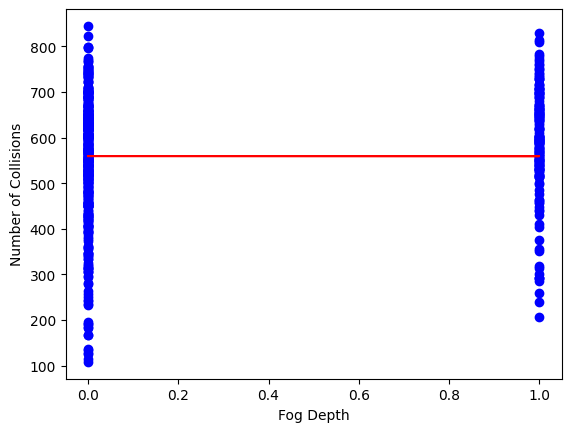

In [ ]:
model_fog = LinearRegression()
model_fog.fit(X_train, Y_train)
print("Intercept:", model_fog.intercept_)
print("Coefficients:", model_fog.coef_)

plt.scatter(X_test['fog'], Y_test, color="blue")
plt.plot(X_test['fog'], model_fog.predict(X_test), color="red")
plt.xlabel("Fog Depth")
plt.ylabel("Number of Collisions")
plt.show()

There is a very small positive correlation (as seen earlier) however as fog rarely forms the prediction is bound to be lower than a more consistent variable like the temperature or the day.

In [ ]:
# Predict y-value with x-values
Y_pred = model_fog.predict(X_val)

In [ ]:
score = model_fog.score(X_val, Y_val)
print(f"R^2 score: {score:.4f}")

R^2 score: -0.0052


As predicted from the graph, there is a negative prediciton rate with the fog depth as a cause of collision. While collisions do occur when visibility is reduced, it also requires a lot of ingredients for fog to form consistently, therefore proving to be a lesser cause of collisions.

VALIDATION SET SCORES:
* MAX/MIN/DA/FOG vs.NUM_COLLISIONS: 0.0033
* MAX/MIN/DA vs.-------- NUM_COLLISIONS: 0.0039
* MAX/MIN vs.---------------NUM_COLLISIONS: 0.0009
* MAX vs.-----------------------NUM_COLLISIONS: 0.0020
* MIN vs.------------------------NUM_COLLISIONS: 0.0015
* MIN/FOG vs.----------------NUM_COLLISIONS: 0.0009
* MAX/DA vs.-----------------NUM_COLLISIONS: 0.0050
* MIN/DA vs.------------------NUM_COLLISIONS: 0.0045
* FOG vs.------------------------NUM_COLLISIONS: -0.0029

From the validation set scores, fog has a negative correlation between itself and the number of collisions. The strongest correlations are a mixture of max/min temperatures and the day of the week for the number of recorded collisions. Max temperature and the day come to a R2 score of 0.0050, min temperature and the day come to 0.0045 with both max and min along with the day score 0.0039. 

# The Linear Regression Model

First, in order to determine if the year plays a role, there will be three sets of models created for each year. The three sets of models are; 'Max and Day vs. NUM_COLLISIONS', 'Min and Day vs. NUM_COLLISIONS', and 'Max / Min and Day vs. NUM_COLLISIONS'. These same sets will be used when creating the models with Tensorflow. If splitting the dataset into years does not yield any results, then it can be assumed that the year holds no weight on the increase or decreased amount of collision which occur. Therefore, there is no reason to split the dataset into years for the Tensorflow model.

In [ ]:
SCALE_NUM_COLLISIONS = 1.0

In [ ]:
# Import tensorflow
import tensorflow as tf

# Import keras & layers
from tensorflow import keras  
from tensorflow.keras import layers
from tensorflow.keras import regularizers

# Print current version of tensorflow
print(tf.__version__)

2.12.0


###Collisions in 2012

####Max and Day vs. NUM_COLLISIONS

In [ ]:
# Dataframe with inputs and outputs
df = collisions2012

X = df[['max', 'da']]
y = df['NUM_COLLISIONS']
# Normalize the input features
X = (X - X.mean()) / X.std()

# Split the data into training, validation, and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.7, random_state=42)

# Normalize the input features for training, validation, and testing sets
X_train = (X_train - X.mean()) / X.std()
X_val = (X_val - X.mean()) / X.std()
X_test = (X_test - X.mean()) / X.std()

# Create the model architecture
model = tf.keras.Sequential([
    layers.Dense(units=128, activation='relu', input_shape=[2],
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=32, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')

# Train the model with a validation set
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val),
                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

# Evaluate the model on the testing set
mae_max_da_2012 = model.evaluate(X_test, y_test, verbose=1)
print(mae_max_da_2012)

Epoch 1/500
3/3 [==============================] - 5s 536ms/step - loss: 548.6144 - val_loss: 561.0357
Epoch 2/500
3/3 [==============================] - 0s 94ms/step - loss: 548.3831 - val_loss: 560.7908
Epoch 3/500
3/3 [==============================] - 0s 179ms/step - loss: 548.1443 - val_loss: 560.5237
Epoch 4/500
3/3 [==============================] - 1s 215ms/step - loss: 547.8774 - val_loss: 560.2287
Epoch 5/500
3/3 [==============================] - 0s 123ms/step - loss: 547.5808 - val_loss: 559.8882
Epoch 6/500
3/3 [==============================] - 0s 131ms/step - loss: 547.2352 - val_loss: 559.4858
Epoch 7/500
3/3 [==============================] - 0s 185ms/step - loss: 546.8342 - val_loss: 559.0103
Epoch 8/500
3/3 [==============================] - 0s 184ms/step - loss: 546.3514 - val_loss: 558.4531
Epoch 9/500
3/3 [==============================] - 0s 74ms/step - loss: 545.7945 - val_loss: 557.7948
Epoch 10/500
3/3 [==============================] - 0s 81ms/step - loss: 54

####Min and Day vs. NUM_COLLISIONS

In [ ]:
X = df[['min', 'da']]
y = df['NUM_COLLISIONS']
# Normalize the input features
X = (X - X.mean()) / X.std()

# Split the data into training, validation, and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.7, random_state=42)

# Normalize the input features for training, validation, and testing sets
X_train = (X_train - X.mean()) / X.std()
X_val = (X_val - X.mean()) / X.std()
X_test = (X_test - X.mean()) / X.std()

# Create the model architecture
model = tf.keras.Sequential([
    layers.Dense(units=128, activation='relu', input_shape=[2],
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=32, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')

# Train the model with a validation set
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val),
                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

# Evaluate the model on the testing set
mae_min_da_2012 = model.evaluate(X_test, y_test, verbose=1)
print(mae_min_da_2012)

Epoch 1/500
3/3 [==============================] - 2s 147ms/step - loss: 548.8239 - val_loss: 561.2870
Epoch 2/500
3/3 [==============================] - 0s 30ms/step - loss: 548.6512 - val_loss: 561.1346
Epoch 3/500
3/3 [==============================] - 0s 25ms/step - loss: 548.4947 - val_loss: 560.9825
Epoch 4/500
3/3 [==============================] - 0s 25ms/step - loss: 548.3365 - val_loss: 560.8187
Epoch 5/500
3/3 [==============================] - 0s 29ms/step - loss: 548.1605 - val_loss: 560.6302
Epoch 6/500
3/3 [==============================] - 0s 24ms/step - loss: 547.9618 - val_loss: 560.4146
Epoch 7/500
3/3 [==============================] - 0s 26ms/step - loss: 547.7315 - val_loss: 560.1678
Epoch 8/500
3/3 [==============================] - 0s 26ms/step - loss: 547.4644 - val_loss: 559.8820
Epoch 9/500
3/3 [==============================] - 0s 32ms/step - loss: 547.1552 - val_loss: 559.5435
Epoch 10/500
3/3 [==============================] - 0s 33ms/step - loss: 546.7842

####Max/Min and Day vs. NUM_COLLISIONS

In [ ]:
X = df[['max', 'min', 'da']]
y = df['NUM_COLLISIONS']
# Normalize the input features
X = (X - X.mean()) / X.std()

# Split the data into training, validation, and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.7, random_state=42)

# Normalize the input features for training, validation, and testing sets
X_train = (X_train - X.mean()) / X.std()
X_val = (X_val - X.mean()) / X.std()
X_test = (X_test - X.mean()) / X.std()

# Create the model architecture
model = tf.keras.Sequential([
    layers.Dense(units=128, activation='relu', input_shape=[3],
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=32, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')

# Train the model with a validation set
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val),
                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

# Evaluate the model on the testing set
mae_max_min_da_2012 = model.evaluate(X_test, y_test, verbose=1)
print(mae_max_min_da_2012)

Epoch 1/500
3/3 [==============================] - 1s 94ms/step - loss: 548.8517 - val_loss: 561.2518
Epoch 2/500
3/3 [==============================] - 0s 21ms/step - loss: 548.6245 - val_loss: 561.0248
Epoch 3/500
3/3 [==============================] - 0s 19ms/step - loss: 548.4005 - val_loss: 560.7947
Epoch 4/500
3/3 [==============================] - 0s 18ms/step - loss: 548.1712 - val_loss: 560.5499
Epoch 5/500
3/3 [==============================] - 0s 20ms/step - loss: 547.9318 - val_loss: 560.2786
Epoch 6/500
3/3 [==============================] - 0s 17ms/step - loss: 547.6562 - val_loss: 559.9666
Epoch 7/500
3/3 [==============================] - 0s 20ms/step - loss: 547.3468 - val_loss: 559.6008
Epoch 8/500
3/3 [==============================] - 0s 17ms/step - loss: 546.9702 - val_loss: 559.1569
Epoch 9/500
3/3 [==============================] - 0s 18ms/step - loss: 546.5070 - val_loss: 558.6122
Epoch 10/500
3/3 [==============================] - 0s 21ms/step - loss: 545.9481 

###Collisions in 2013

####Max and Day vs. NUM_COLLISIONS

In [ ]:
# Dataframe with inputs and outputs
df = collisions2013

X = df[['max', 'da']]
y = df['NUM_COLLISIONS']
# Normalize the input features
X = (X - X.mean()) / X.std()

# Split the data into training, validation, and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.7, random_state=42)

# Normalize the input features for training, validation, and testing sets
X_train = (X_train - X.mean()) / X.std()
X_val = (X_val - X.mean()) / X.std()
X_test = (X_test - X.mean()) / X.std()

# Create the model architecture
model = tf.keras.Sequential([
    layers.Dense(units=128, activation='relu', input_shape=[2],
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=32, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')

# Train the model with a validation set
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val),
                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

# Evaluate the model on the testing set
mae_max_da_2013 = model.evaluate(X_test, y_test, verbose=1)
print(mae_max_da_2013)

Epoch 1/500
6/6 [==============================] - 1s 52ms/step - loss: 555.4934 - val_loss: 563.4311
Epoch 2/500
6/6 [==============================] - 0s 13ms/step - loss: 555.0595 - val_loss: 563.0308
Epoch 3/500
6/6 [==============================] - 0s 15ms/step - loss: 554.5839 - val_loss: 562.5231
Epoch 4/500
6/6 [==============================] - 0s 16ms/step - loss: 553.9586 - val_loss: 561.8330
Epoch 5/500
6/6 [==============================] - 0s 17ms/step - loss: 553.1099 - val_loss: 560.8944
Epoch 6/500
6/6 [==============================] - 0s 12ms/step - loss: 551.9379 - val_loss: 559.5623
Epoch 7/500
6/6 [==============================] - 0s 13ms/step - loss: 550.2485 - val_loss: 557.6527
Epoch 8/500
6/6 [==============================] - 0s 11ms/step - loss: 547.8428 - val_loss: 554.9294
Epoch 9/500
6/6 [==============================] - 0s 12ms/step - loss: 544.4863 - val_loss: 551.1140
Epoch 10/500
6/6 [==============================] - 0s 12ms/step - loss: 539.7657 

####Min and Day vs. NUM_COLLISIONS

In [ ]:
X = df[['min', 'da']]
y = df['NUM_COLLISIONS']
# Normalize the input features
X = (X - X.mean()) / X.std()

# Split the data into training, validation, and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.7, random_state=42)

# Normalize the input features for training, validation, and testing sets
X_train = (X_train - X.mean()) / X.std()
X_val = (X_val - X.mean()) / X.std()
X_test = (X_test - X.mean()) / X.std()

# Create the model architecture
model = tf.keras.Sequential([
    layers.Dense(units=128, activation='relu', input_shape=[2],
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=32, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')

# Train the model with a validation set
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val),
                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

# Evaluate the model on the testing set
mae_min_da_2013 = model.evaluate(X_test, y_test, verbose=1)
print(mae_min_da_2013)

Epoch 1/500
6/6 [==============================] - 1s 41ms/step - loss: 555.5489 - val_loss: 563.5369
Epoch 2/500
6/6 [==============================] - 0s 12ms/step - loss: 555.2635 - val_loss: 563.2741
Epoch 3/500
6/6 [==============================] - 0s 10ms/step - loss: 554.9741 - val_loss: 562.9638
Epoch 4/500
6/6 [==============================] - 0s 12ms/step - loss: 554.6152 - val_loss: 562.5559
Epoch 5/500
6/6 [==============================] - 0s 13ms/step - loss: 554.1381 - val_loss: 562.0039
Epoch 6/500
6/6 [==============================] - 0s 12ms/step - loss: 553.4661 - val_loss: 561.2117
Epoch 7/500
6/6 [==============================] - 0s 12ms/step - loss: 552.4856 - val_loss: 560.0657
Epoch 8/500
6/6 [==============================] - 0s 9ms/step - loss: 551.0878 - val_loss: 558.4127
Epoch 9/500
6/6 [==============================] - 0s 12ms/step - loss: 549.0691 - val_loss: 556.0285
Epoch 10/500
6/6 [==============================] - 0s 12ms/step - loss: 546.1766 -

####Max/Min and Day vs. NUM_COLLISIONS

In [ ]:
X = df[['max', 'min', 'da']]
y = df['NUM_COLLISIONS']
# Normalize the input features
X = (X - X.mean()) / X.std()

# Split the data into training, validation, and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.7, random_state=42)

# Normalize the input features for training, validation, and testing sets
X_train = (X_train - X.mean()) / X.std()
X_val = (X_val - X.mean()) / X.std()
X_test = (X_test - X.mean()) / X.std()

# Create the model architecture
model = tf.keras.Sequential([
    layers.Dense(units=128, activation='relu', input_shape=[3],
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=32, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')

# Train the model with a validation set
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val),
                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

# Evaluate the model on the testing set
mae_max_min_da_2013 = model.evaluate(X_test, y_test, verbose=1)
print(mae_max_min_da_2013)

Epoch 1/500
6/6 [==============================] - 1s 43ms/step - loss: 555.5512 - val_loss: 563.4540
Epoch 2/500
6/6 [==============================] - 0s 13ms/step - loss: 555.1176 - val_loss: 563.0220
Epoch 3/500
6/6 [==============================] - 0s 9ms/step - loss: 554.6157 - val_loss: 562.4616
Epoch 4/500
6/6 [==============================] - 0s 9ms/step - loss: 553.9651 - val_loss: 561.6738
Epoch 5/500
6/6 [==============================] - 0s 12ms/step - loss: 553.0170 - val_loss: 560.5135
Epoch 6/500
6/6 [==============================] - 0s 12ms/step - loss: 551.6561 - val_loss: 558.8165
Epoch 7/500
6/6 [==============================] - 0s 12ms/step - loss: 549.6937 - val_loss: 556.3930
Epoch 8/500
6/6 [==============================] - 0s 11ms/step - loss: 546.9019 - val_loss: 552.9760
Epoch 9/500
6/6 [==============================] - 0s 13ms/step - loss: 542.9726 - val_loss: 548.2239
Epoch 10/500
6/6 [==============================] - 0s 10ms/step - loss: 537.5522 - 

###Collisions in 2014

####Max and Day vs. NUM_COLLISIONS

In [ ]:
# Dataframe with inputs and outputs
df = collisions2014

X = df[['max', 'da']]
y = df['NUM_COLLISIONS']
# Normalize the input features
X = (X - X.mean()) / X.std()

# Split the data into training, validation, and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.7, random_state=42)

# Normalize the input features for training, validation, and testing sets
X_train = (X_train - X.mean()) / X.std()
X_val = (X_val - X.mean()) / X.std()
X_test = (X_test - X.mean()) / X.std()

# Create the model architecture
model = tf.keras.Sequential([
    layers.Dense(units=128, activation='relu', input_shape=[2],
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=32, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')

# Train the model with a validation set
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val),
                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

# Evaluate the model on the testing set
mae_max_da_2014 = model.evaluate(X_test, y_test, verbose=1)
print(mae_max_da_2014)

Epoch 1/500
7/7 [==============================] - 1s 37ms/step - loss: 566.6396 - val_loss: 562.5914
Epoch 2/500
7/7 [==============================] - 0s 12ms/step - loss: 566.2859 - val_loss: 562.2432
Epoch 3/500
7/7 [==============================] - 0s 7ms/step - loss: 565.8747 - val_loss: 561.7975
Epoch 4/500
7/7 [==============================] - 0s 10ms/step - loss: 565.3190 - val_loss: 561.1694
Epoch 5/500
7/7 [==============================] - 0s 11ms/step - loss: 564.5075 - val_loss: 560.2188
Epoch 6/500
7/7 [==============================] - 0s 11ms/step - loss: 563.2653 - val_loss: 558.7854
Epoch 7/500
7/7 [==============================] - 0s 9ms/step - loss: 561.4062 - val_loss: 556.6245
Epoch 8/500
7/7 [==============================] - 0s 8ms/step - loss: 558.5993 - val_loss: 553.4224
Epoch 9/500
7/7 [==============================] - 0s 11ms/step - loss: 554.5159 - val_loss: 548.7574
Epoch 10/500
7/7 [==============================] - 0s 8ms/step - loss: 548.5881 - va

####Min and Day vs. NUM_COLLISIONS

In [ ]:
X = df[['min', 'da']]
y = df['NUM_COLLISIONS']
# Normalize the input features
X = (X - X.mean()) / X.std()

# Split the data into training, validation, and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.7, random_state=42)

# Normalize the input features for training, validation, and testing sets
X_train = (X_train - X.mean()) / X.std()
X_val = (X_val - X.mean()) / X.std()
X_test = (X_test - X.mean()) / X.std()

# Create the model architecture
model = tf.keras.Sequential([
    layers.Dense(units=128, activation='relu', input_shape=[2],
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=32, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')

# Train the model with a validation set
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val),
                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

# Evaluate the model on the testing set
mae_min_da_2014 = model.evaluate(X_test, y_test, verbose=1)
print(mae_min_da_2014)

Epoch 1/500
7/7 [==============================] - 2s 34ms/step - loss: 566.7394 - val_loss: 562.6801
Epoch 2/500
7/7 [==============================] - 0s 8ms/step - loss: 566.4142 - val_loss: 562.3809
Epoch 3/500
7/7 [==============================] - 0s 11ms/step - loss: 566.0861 - val_loss: 562.0047
Epoch 4/500
7/7 [==============================] - 0s 8ms/step - loss: 565.6485 - val_loss: 561.4926
Epoch 5/500
7/7 [==============================] - 0s 8ms/step - loss: 565.0327 - val_loss: 560.7680
Epoch 6/500
7/7 [==============================] - 0s 11ms/step - loss: 564.1539 - val_loss: 559.7130
Epoch 7/500
7/7 [==============================] - 0s 11ms/step - loss: 562.8539 - val_loss: 558.1393
Epoch 8/500
7/7 [==============================] - 0s 8ms/step - loss: 560.9222 - val_loss: 555.8013
Epoch 9/500
7/7 [==============================] - 0s 8ms/step - loss: 558.0677 - val_loss: 552.3707
Epoch 10/500
7/7 [==============================] - 0s 8ms/step - loss: 553.8757 - val_

####Max/Min and Day vs. NUM_COLLISIONS

In [ ]:
X = df[['max', 'min', 'da']]
y = df['NUM_COLLISIONS']
# Normalize the input features
X = (X - X.mean()) / X.std()

# Split the data into training, validation, and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.7, random_state=42)

# Normalize the input features for training, validation, and testing sets
X_train = (X_train - X.mean()) / X.std()
X_val = (X_val - X.mean()) / X.std()
X_test = (X_test - X.mean()) / X.std()

# Create the model architecture
model = tf.keras.Sequential([
    layers.Dense(units=128, activation='relu', input_shape=[3],
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=32, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')

# Train the model with a validation set
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val),
                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

# Evaluate the model on the testing set
mae_max_min_da_2014 = model.evaluate(X_test, y_test, verbose=1)
print(mae_max_min_da_2014)

Epoch 1/500
7/7 [==============================] - 1s 53ms/step - loss: 566.5654 - val_loss: 562.4951
Epoch 2/500
7/7 [==============================] - 0s 15ms/step - loss: 566.1370 - val_loss: 562.0150
Epoch 3/500
7/7 [==============================] - 0s 11ms/step - loss: 565.5546 - val_loss: 561.3242
Epoch 4/500
7/7 [==============================] - 0s 11ms/step - loss: 564.6951 - val_loss: 560.2905
Epoch 5/500
7/7 [==============================] - 0s 13ms/step - loss: 563.3940 - val_loss: 558.7430
Epoch 6/500
7/7 [==============================] - 0s 11ms/step - loss: 561.4703 - val_loss: 556.4117
Epoch 7/500
7/7 [==============================] - 0s 13ms/step - loss: 558.5735 - val_loss: 552.9141
Epoch 8/500
7/7 [==============================] - 0s 12ms/step - loss: 554.2157 - val_loss: 547.7513
Epoch 9/500
7/7 [==============================] - 0s 12ms/step - loss: 547.8369 - val_loss: 540.3026
Epoch 10/500
7/7 [==============================] - 0s 11ms/step - loss: 538.8280 

###Collisions in 2015

####Max and Day vs. NUM_COLLISIONS

In [ ]:
# Dataframe with inputs and outputs
df = collisions2015

X = df[['max', 'da']]
y = df['NUM_COLLISIONS']
# Normalize the input features
X = (X - X.mean()) / X.std()

# Split the data into training, validation, and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.7, random_state=42)

# Normalize the input features for training, validation, and testing sets
X_train = (X_train - X.mean()) / X.std()
X_val = (X_val - X.mean()) / X.std()
X_test = (X_test - X.mean()) / X.std()

# Create the model architecture
model = tf.keras.Sequential([
    layers.Dense(units=128, activation='relu', input_shape=[2],
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=32, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')

# Train the model with a validation set
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val),
                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

# Evaluate the model on the testing set
mae_max_da_2015 = model.evaluate(X_test, y_test, verbose=1)
print(mae_max_da_2015)

Epoch 1/500
6/6 [==============================] - 1s 39ms/step - loss: 596.0302 - val_loss: 599.6404
Epoch 2/500
6/6 [==============================] - 0s 9ms/step - loss: 595.6147 - val_loss: 599.2271
Epoch 3/500
6/6 [==============================] - 0s 9ms/step - loss: 595.1700 - val_loss: 598.7238
Epoch 4/500
6/6 [==============================] - 0s 9ms/step - loss: 594.6141 - val_loss: 598.0638
Epoch 5/500
6/6 [==============================] - 0s 12ms/step - loss: 593.8555 - val_loss: 597.1643
Epoch 6/500
6/6 [==============================] - 0s 9ms/step - loss: 592.8172 - val_loss: 595.9252
Epoch 7/500
6/6 [==============================] - 0s 8ms/step - loss: 591.3865 - val_loss: 594.2122
Epoch 8/500
6/6 [==============================] - 0s 14ms/step - loss: 589.3907 - val_loss: 591.8755
Epoch 9/500
6/6 [==============================] - 0s 11ms/step - loss: 586.6041 - val_loss: 588.6786
Epoch 10/500
6/6 [==============================] - 0s 10ms/step - loss: 582.8991 - val

####Min and Day vs. NUM_COLLISIONS

In [ ]:
X = df[['min', 'da']]
y = df['NUM_COLLISIONS']
# Normalize the input features
X = (X - X.mean()) / X.std()

# Split the data into training, validation, and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.7, random_state=42)

# Normalize the input features for training, validation, and testing sets
X_train = (X_train - X.mean()) / X.std()
X_val = (X_val - X.mean()) / X.std()
X_test = (X_test - X.mean()) / X.std()

# Create the model architecture
model = tf.keras.Sequential([
    layers.Dense(units=128, activation='relu', input_shape=[2],
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=32, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')

# Train the model with a validation set
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val),
                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

# Evaluate the model on the testing set
mae_min_da_2015 = model.evaluate(X_test, y_test, verbose=1)
print(mae_min_da_2015)

Epoch 1/500
6/6 [==============================] - 1s 37ms/step - loss: 595.8918 - val_loss: 599.5577
Epoch 2/500
6/6 [==============================] - 0s 9ms/step - loss: 595.5134 - val_loss: 599.1786
Epoch 3/500
6/6 [==============================] - 0s 12ms/step - loss: 595.0712 - val_loss: 598.6981
Epoch 4/500
6/6 [==============================] - 0s 9ms/step - loss: 594.4931 - val_loss: 598.0301
Epoch 5/500
6/6 [==============================] - 0s 12ms/step - loss: 593.6555 - val_loss: 597.0474
Epoch 6/500
6/6 [==============================] - 0s 10ms/step - loss: 592.4557 - val_loss: 595.6097
Epoch 7/500
6/6 [==============================] - 0s 12ms/step - loss: 590.7053 - val_loss: 593.4893
Epoch 8/500
6/6 [==============================] - 0s 9ms/step - loss: 588.1790 - val_loss: 590.5106
Epoch 9/500
6/6 [==============================] - 0s 13ms/step - loss: 584.6476 - val_loss: 586.3602
Epoch 10/500
6/6 [==============================] - 0s 12ms/step - loss: 579.7302 - v

####Max/Min and Day vs. NUM_COLLISIONS

In [ ]:
X = df[['max', 'min', 'da']]
y = df['NUM_COLLISIONS']
# Normalize the input features
X = (X - X.mean()) / X.std()

# Split the data into training, validation, and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.7, random_state=42)

# Normalize the input features for training, validation, and testing sets
X_train = (X_train - X.mean()) / X.std()
X_val = (X_val - X.mean()) / X.std()
X_test = (X_test - X.mean()) / X.std()

# Create the model architecture
model = tf.keras.Sequential([
    layers.Dense(units=128, activation='relu', input_shape=[3],
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=32, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')

# Train the model with a validation set
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val),
                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

# Evaluate the model on the testing set
mae_max_min_da_2015 = model.evaluate(X_test, y_test, verbose=1)
print(mae_max_min_da_2015)

Epoch 1/500
6/6 [==============================] - 2s 60ms/step - loss: 596.0286 - val_loss: 599.6813
Epoch 2/500
6/6 [==============================] - 0s 13ms/step - loss: 595.6890 - val_loss: 599.3556
Epoch 3/500
6/6 [==============================] - 0s 12ms/step - loss: 595.3361 - val_loss: 598.9603
Epoch 4/500
6/6 [==============================] - 0s 15ms/step - loss: 594.8764 - val_loss: 598.4205
Epoch 5/500
6/6 [==============================] - 0s 15ms/step - loss: 594.2293 - val_loss: 597.6653
Epoch 6/500
6/6 [==============================] - 0s 17ms/step - loss: 593.3428 - val_loss: 596.5906
Epoch 7/500
6/6 [==============================] - 0s 14ms/step - loss: 592.0689 - val_loss: 595.0419
Epoch 8/500
6/6 [==============================] - 0s 16ms/step - loss: 590.2217 - val_loss: 592.8117
Epoch 9/500
6/6 [==============================] - 0s 16ms/step - loss: 587.5318 - val_loss: 589.6477
Epoch 10/500
6/6 [==============================] - 0s 12ms/step - loss: 583.8516 

###Collisions in 2016

####Max and Day vs. NUM_COLLISIONS

In [ ]:
# Dataframe with inputs and outputs
df = collisions2016

X = df[['max', 'da']]
y = df['NUM_COLLISIONS']
# Normalize the input features
X = (X - X.mean()) / X.std()

# Split the data into training, validation, and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.7, random_state=42)

# Normalize the input features for training, validation, and testing sets
X_train = (X_train - X.mean()) / X.std()
X_val = (X_val - X.mean()) / X.std()
X_test = (X_test - X.mean()) / X.std()

# Create the model architecture
model = tf.keras.Sequential([
    layers.Dense(units=128, activation='relu', input_shape=[2],
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=32, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')

# Train the model with a validation set
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val),
                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

# Evaluate the model on the testing set
mae_max_da_2016 = model.evaluate(X_test, y_test, verbose=1)
print(mae_max_da_2016)

Epoch 1/500
6/6 [==============================] - 1s 58ms/step - loss: 628.7567 - val_loss: 619.8478
Epoch 2/500
6/6 [==============================] - 0s 14ms/step - loss: 628.2905 - val_loss: 619.3873
Epoch 3/500
6/6 [==============================] - 0s 18ms/step - loss: 627.7943 - val_loss: 618.8364
Epoch 4/500
6/6 [==============================] - 0s 16ms/step - loss: 627.1697 - val_loss: 618.1133
Epoch 5/500
6/6 [==============================] - 0s 15ms/step - loss: 626.3196 - val_loss: 617.1015
Epoch 6/500
6/6 [==============================] - 0s 17ms/step - loss: 625.1337 - val_loss: 615.7007
Epoch 7/500
6/6 [==============================] - 0s 16ms/step - loss: 623.5093 - val_loss: 613.7540
Epoch 8/500
6/6 [==============================] - 0s 14ms/step - loss: 621.2144 - val_loss: 611.0546
Epoch 9/500
6/6 [==============================] - 0s 12ms/step - loss: 618.0712 - val_loss: 607.3110
Epoch 10/500
6/6 [==============================] - 0s 13ms/step - loss: 613.7142 

####Min and Day vs. NUM_COLLISIONS

In [ ]:
X = df[['min', 'da']]
y = df['NUM_COLLISIONS']
# Normalize the input features
X = (X - X.mean()) / X.std()

# Split the data into training, validation, and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.7, random_state=42)

# Normalize the input features for training, validation, and testing sets
X_train = (X_train - X.mean()) / X.std()
X_val = (X_val - X.mean()) / X.std()
X_test = (X_test - X.mean()) / X.std()

# Create the model architecture
model = tf.keras.Sequential([
    layers.Dense(units=128, activation='relu', input_shape=[2],
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=32, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')

# Train the model with a validation set
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val),
                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

# Evaluate the model on the testing set
mae_min_da_2016 = model.evaluate(X_test, y_test, verbose=1)
print(mae_min_da_2016)

Epoch 1/500
6/6 [==============================] - 1s 38ms/step - loss: 628.7721 - val_loss: 619.9274
Epoch 2/500
6/6 [==============================] - 0s 9ms/step - loss: 628.3926 - val_loss: 619.5414
Epoch 3/500
6/6 [==============================] - 0s 8ms/step - loss: 627.9645 - val_loss: 619.0496
Epoch 4/500
6/6 [==============================] - 0s 9ms/step - loss: 627.3806 - val_loss: 618.3630
Epoch 5/500
6/6 [==============================] - 0s 10ms/step - loss: 626.5627 - val_loss: 617.3695
Epoch 6/500
6/6 [==============================] - 0s 14ms/step - loss: 625.3637 - val_loss: 615.9443
Epoch 7/500
6/6 [==============================] - 0s 9ms/step - loss: 623.6544 - val_loss: 613.9126
Epoch 8/500
6/6 [==============================] - 0s 12ms/step - loss: 621.2194 - val_loss: 611.0048
Epoch 9/500
6/6 [==============================] - 0s 14ms/step - loss: 617.7256 - val_loss: 606.8641
Epoch 10/500
6/6 [==============================] - 0s 9ms/step - loss: 612.8189 - val

####Max/Min and Day vs. NUM_COLLISIONS

In [ ]:
X = df[['max', 'min', 'da']]
y = df['NUM_COLLISIONS']
# Normalize the input features
X = (X - X.mean()) / X.std()

# Split the data into training, validation, and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.7, random_state=42)

# Normalize the input features for training, validation, and testing sets
X_train = (X_train - X.mean()) / X.std()
X_val = (X_val - X.mean()) / X.std()
X_test = (X_test - X.mean()) / X.std()

# Create the model architecture
model = tf.keras.Sequential([
    layers.Dense(units=128, activation='relu', input_shape=[3],
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=32, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')

# Train the model with a validation set
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val),
                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

# Evaluate the model on the testing set
mae_max_min_da_2016 = model.evaluate(X_test, y_test, verbose=1)
print(mae_max_min_da_2016)

Epoch 1/500
6/6 [==============================] - 1s 41ms/step - loss: 628.6396 - val_loss: 619.7618
Epoch 2/500
6/6 [==============================] - 0s 12ms/step - loss: 628.2066 - val_loss: 619.2933
Epoch 3/500
6/6 [==============================] - 0s 12ms/step - loss: 627.6760 - val_loss: 618.6780
Epoch 4/500
6/6 [==============================] - 0s 9ms/step - loss: 626.9600 - val_loss: 617.8401
Epoch 5/500
6/6 [==============================] - 0s 8ms/step - loss: 625.9876 - val_loss: 616.6687
Epoch 6/500
6/6 [==============================] - 0s 9ms/step - loss: 624.5919 - val_loss: 614.9785
Epoch 7/500
6/6 [==============================] - 0s 8ms/step - loss: 622.6127 - val_loss: 612.5400
Epoch 8/500
6/6 [==============================] - 0s 9ms/step - loss: 619.7043 - val_loss: 609.0078
Epoch 9/500
6/6 [==============================] - 0s 9ms/step - loss: 615.4998 - val_loss: 604.0231
Epoch 10/500
6/6 [==============================] - 0s 9ms/step - loss: 609.6675 - val_l

###Collisions in 2017

####Max and Day vs. NUM_COLLISIONS

In [ ]:
# Dataframe with inputs and outputs
df = collisions2017

X = df[['max', 'da']]
y = df['NUM_COLLISIONS']
# Normalize the input features
X = (X - X.mean()) / X.std()

# Split the data into training, validation, and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.7, random_state=42)

# Normalize the input features for training, validation, and testing sets
X_train = (X_train - X.mean()) / X.std()
X_val = (X_val - X.mean()) / X.std()
X_test = (X_test - X.mean()) / X.std()

# Create the model architecture
model = tf.keras.Sequential([
    layers.Dense(units=128, activation='relu', input_shape=[2],
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=32, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')

# Train the model with a validation set
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val),
                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

# Evaluate the model on the testing set
mae_max_da_2017 = model.evaluate(X_test, y_test, verbose=1)
print(mae_max_da_2017)

Epoch 1/500
6/6 [==============================] - 1s 38ms/step - loss: 631.7662 - val_loss: 626.4670
Epoch 2/500
6/6 [==============================] - 0s 12ms/step - loss: 631.4796 - val_loss: 626.1520
Epoch 3/500
6/6 [==============================] - 0s 12ms/step - loss: 631.1606 - val_loss: 625.7556
Epoch 4/500
6/6 [==============================] - 0s 12ms/step - loss: 630.7340 - val_loss: 625.2089
Epoch 5/500
6/6 [==============================] - 0s 9ms/step - loss: 630.1523 - val_loss: 624.4146
Epoch 6/500
6/6 [==============================] - 0s 12ms/step - loss: 629.2870 - val_loss: 623.2535
Epoch 7/500
6/6 [==============================] - 0s 8ms/step - loss: 627.9930 - val_loss: 621.5574
Epoch 8/500
6/6 [==============================] - 0s 10ms/step - loss: 626.1197 - val_loss: 619.0544
Epoch 9/500
6/6 [==============================] - 0s 9ms/step - loss: 623.3788 - val_loss: 615.4376
Epoch 10/500
6/6 [==============================] - 0s 14ms/step - loss: 619.4279 - v

####Min and Day vs. NUM_COLLISIONS

In [ ]:
X = df[['min', 'da']]
y = df['NUM_COLLISIONS']
# Normalize the input features
X = (X - X.mean()) / X.std()

# Split the data into training, validation, and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.7, random_state=42)

# Normalize the input features for training, validation, and testing sets
X_train = (X_train - X.mean()) / X.std()
X_val = (X_val - X.mean()) / X.std()
X_test = (X_test - X.mean()) / X.std()

# Create the model architecture
model = tf.keras.Sequential([
    layers.Dense(units=128, activation='relu', input_shape=[2],
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=32, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')

# Train the model with a validation set
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val),
                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

# Evaluate the model on the testing set
mae_min_da_2017 = model.evaluate(X_test, y_test, verbose=1)
print(mae_min_da_2017)

Epoch 1/500
6/6 [==============================] - 1s 41ms/step - loss: 631.6672 - val_loss: 626.3650
Epoch 2/500
6/6 [==============================] - 0s 9ms/step - loss: 631.3467 - val_loss: 626.0325
Epoch 3/500
6/6 [==============================] - 0s 12ms/step - loss: 631.0002 - val_loss: 625.6143
Epoch 4/500
6/6 [==============================] - 0s 8ms/step - loss: 630.5494 - val_loss: 625.0610
Epoch 5/500
6/6 [==============================] - 0s 12ms/step - loss: 629.9421 - val_loss: 624.2820
Epoch 6/500
6/6 [==============================] - 0s 11ms/step - loss: 629.0856 - val_loss: 623.1799
Epoch 7/500
6/6 [==============================] - 0s 9ms/step - loss: 627.8690 - val_loss: 621.6122
Epoch 8/500
6/6 [==============================] - 0s 12ms/step - loss: 626.1468 - val_loss: 619.4051
Epoch 9/500
6/6 [==============================] - 0s 11ms/step - loss: 623.7421 - val_loss: 616.3278
Epoch 10/500
6/6 [==============================] - 0s 8ms/step - loss: 620.3217 - va

####Max/Min and Day vs. NUM_COLLISIONS

In [ ]:
X = df[['max', 'min', 'da']]
y = df['NUM_COLLISIONS']
# Normalize the input features
X = (X - X.mean()) / X.std()

# Split the data into training, validation, and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.7, random_state=42)

# Normalize the input features for training, validation, and testing sets
X_train = (X_train - X.mean()) / X.std()
X_val = (X_val - X.mean()) / X.std()
X_test = (X_test - X.mean()) / X.std()

# Create the model architecture
model = tf.keras.Sequential([
    layers.Dense(units=128, activation='relu', input_shape=[3],
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=32, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')

# Train the model with a validation set
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val),
                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

# Evaluate the model on the testing set
mae_max_min_da_2017 = model.evaluate(X_test, y_test, verbose=1)
print(mae_max_min_da_2017)

Epoch 1/500
6/6 [==============================] - 1s 43ms/step - loss: 631.8103 - val_loss: 626.5223
Epoch 2/500
6/6 [==============================] - 0s 13ms/step - loss: 631.5361 - val_loss: 626.2269
Epoch 3/500
6/6 [==============================] - 0s 12ms/step - loss: 631.2476 - val_loss: 625.8610
Epoch 4/500
6/6 [==============================] - 0s 13ms/step - loss: 630.8644 - val_loss: 625.3659
Epoch 5/500
6/6 [==============================] - 0s 12ms/step - loss: 630.3408 - val_loss: 624.6464
Epoch 6/500
6/6 [==============================] - 0s 9ms/step - loss: 629.5547 - val_loss: 623.5719
Epoch 7/500
6/6 [==============================] - 0s 10ms/step - loss: 628.4160 - val_loss: 621.9789
Epoch 8/500
6/6 [==============================] - 0s 9ms/step - loss: 626.7010 - val_loss: 619.6406
Epoch 9/500
6/6 [==============================] - 0s 9ms/step - loss: 624.2044 - val_loss: 616.2769
Epoch 10/500
6/6 [==============================] - 0s 10ms/step - loss: 620.6294 - v

###Collisions in 2018

####Max and Day vs. NUM_COLLISIONS

In [ ]:
# Dataframe with inputs and outputs
df = collisions2018

X = df[['max', 'da']]
y = df['NUM_COLLISIONS']
# Normalize the input features
X = (X - X.mean()) / X.std()

# Split the data into training, validation, and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.7, random_state=42)

# Normalize the input features for training, validation, and testing sets
X_train = (X_train - X.mean()) / X.std()
X_val = (X_val - X.mean()) / X.std()
X_test = (X_test - X.mean()) / X.std()

# Create the model architecture
model = tf.keras.Sequential([
    layers.Dense(units=128, activation='relu', input_shape=[2],
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=32, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')

# Train the model with a validation set
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val),
                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

# Evaluate the model on the testing set
mae_max_da_2018 = model.evaluate(X_test, y_test, verbose=1)
print(mae_max_da_2018)

Epoch 1/500
6/6 [==============================] - 1s 43ms/step - loss: 634.4641 - val_loss: 636.1481
Epoch 2/500
6/6 [==============================] - 0s 11ms/step - loss: 634.1873 - val_loss: 635.8307
Epoch 3/500
6/6 [==============================] - 0s 13ms/step - loss: 633.8641 - val_loss: 635.4312
Epoch 4/500
6/6 [==============================] - 0s 14ms/step - loss: 633.4492 - val_loss: 634.8895
Epoch 5/500
6/6 [==============================] - 0s 13ms/step - loss: 632.8661 - val_loss: 634.1277
Epoch 6/500
6/6 [==============================] - 0s 13ms/step - loss: 632.0513 - val_loss: 633.0471
Epoch 7/500
6/6 [==============================] - 0s 17ms/step - loss: 630.9034 - val_loss: 631.5143
Epoch 8/500
6/6 [==============================] - 0s 15ms/step - loss: 629.2639 - val_loss: 629.3315
Epoch 9/500
6/6 [==============================] - 0s 14ms/step - loss: 626.9370 - val_loss: 626.2391
Epoch 10/500
6/6 [==============================] - 0s 13ms/step - loss: 623.5828 

####Min and Day vs. NUM_COLLISIONS

In [ ]:
X = df[['min', 'da']]
y = df['NUM_COLLISIONS']
# Normalize the input features
X = (X - X.mean()) / X.std()

# Split the data into training, validation, and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.7, random_state=42)

# Normalize the input features for training, validation, and testing sets
X_train = (X_train - X.mean()) / X.std()
X_val = (X_val - X.mean()) / X.std()
X_test = (X_test - X.mean()) / X.std()

# Create the model architecture
model = tf.keras.Sequential([
    layers.Dense(units=128, activation='relu', input_shape=[2],
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=32, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')

# Train the model with a validation set
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val),
                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

# Evaluate the model on the testing set
mae_min_da_2018 = model.evaluate(X_test, y_test, verbose=1)
print(mae_min_da_2018)

Epoch 1/500
6/6 [==============================] - 2s 42ms/step - loss: 634.5247 - val_loss: 636.1696
Epoch 2/500
6/6 [==============================] - 0s 10ms/step - loss: 634.1943 - val_loss: 635.8130
Epoch 3/500
6/6 [==============================] - 0s 11ms/step - loss: 633.8467 - val_loss: 635.3909
Epoch 4/500
6/6 [==============================] - 0s 12ms/step - loss: 633.4031 - val_loss: 634.8208
Epoch 5/500
6/6 [==============================] - 0s 13ms/step - loss: 632.7867 - val_loss: 634.0321
Epoch 6/500
6/6 [==============================] - 0s 13ms/step - loss: 631.9432 - val_loss: 632.9344
Epoch 7/500
6/6 [==============================] - 0s 9ms/step - loss: 630.7554 - val_loss: 631.4019
Epoch 8/500
6/6 [==============================] - 0s 9ms/step - loss: 629.0942 - val_loss: 629.2473
Epoch 9/500
6/6 [==============================] - 0s 9ms/step - loss: 626.7285 - val_loss: 626.2349
Epoch 10/500
6/6 [==============================] - 0s 11ms/step - loss: 623.4697 - v

####Max/Min and Day vs. NUM_COLLISIONS

In [ ]:
X = df[['max', 'min', 'da']]
y = df['NUM_COLLISIONS']
# Normalize the input features
X = (X - X.mean()) / X.std()

# Split the data into training, validation, and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.7, random_state=42)

# Normalize the input features for training, validation, and testing sets
X_train = (X_train - X.mean()) / X.std()
X_val = (X_val - X.mean()) / X.std()
X_test = (X_test - X.mean()) / X.std()

# Create the model architecture
model = tf.keras.Sequential([
    layers.Dense(units=128, activation='relu', input_shape=[3],
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=32, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')

# Train the model with a validation set
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val),
                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

# Evaluate the model on the testing set
mae_max_min_da_2018 = model.evaluate(X_test, y_test, verbose=1)
print(mae_max_min_da_2018)

Epoch 1/500
6/6 [==============================] - 1s 39ms/step - loss: 634.4171 - val_loss: 635.9717
Epoch 2/500
6/6 [==============================] - 0s 13ms/step - loss: 633.9418 - val_loss: 635.4472
Epoch 3/500
6/6 [==============================] - 0s 9ms/step - loss: 633.3925 - val_loss: 634.7659
Epoch 4/500
6/6 [==============================] - 0s 12ms/step - loss: 632.6450 - val_loss: 633.7902
Epoch 5/500
6/6 [==============================] - 0s 12ms/step - loss: 631.5639 - val_loss: 632.3706
Epoch 6/500
6/6 [==============================] - 0s 9ms/step - loss: 629.9955 - val_loss: 630.3165
Epoch 7/500
6/6 [==============================] - 0s 10ms/step - loss: 627.7177 - val_loss: 627.4024
Epoch 8/500
6/6 [==============================] - 0s 13ms/step - loss: 624.5395 - val_loss: 623.2989
Epoch 9/500
6/6 [==============================] - 0s 9ms/step - loss: 620.0956 - val_loss: 617.6321
Epoch 10/500
6/6 [==============================] - 0s 12ms/step - loss: 613.8967 - v

###Collisions in 2019

####Max and Day vs. NUM_COLLISIONS

In [ ]:
# Dataframe with inputs and outputs
df = collisions2019

X = df[['max', 'da']]
y = df['NUM_COLLISIONS']
# Normalize the input features
X = (X - X.mean()) / X.std()

# Split the data into training, validation, and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.7, random_state=42)

# Normalize the input features for training, validation, and testing sets
X_train = (X_train - X.mean()) / X.std()
X_val = (X_val - X.mean()) / X.std()
X_test = (X_test - X.mean()) / X.std()

# Create the model architecture
model = tf.keras.Sequential([
    layers.Dense(units=128, activation='relu', input_shape=[2],
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=32, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')

# Train the model with a validation set
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val),
                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

# Evaluate the model on the testing set
mae_max_da_2019 = model.evaluate(X_test, y_test, verbose=1)
print(mae_max_da_2019)

Epoch 1/500
6/6 [==============================] - 1s 40ms/step - loss: 583.8527 - val_loss: 590.4064
Epoch 2/500
6/6 [==============================] - 0s 8ms/step - loss: 583.4555 - val_loss: 589.9513
Epoch 3/500
6/6 [==============================] - 0s 12ms/step - loss: 582.9665 - val_loss: 589.3509
Epoch 4/500
6/6 [==============================] - 0s 10ms/step - loss: 582.3026 - val_loss: 588.5182
Epoch 5/500
6/6 [==============================] - 0s 14ms/step - loss: 581.3734 - val_loss: 587.3040
Epoch 6/500
6/6 [==============================] - 0s 11ms/step - loss: 580.0069 - val_loss: 585.5125
Epoch 7/500
6/6 [==============================] - 0s 12ms/step - loss: 577.9570 - val_loss: 582.8386
Epoch 8/500
6/6 [==============================] - 0s 10ms/step - loss: 574.9501 - val_loss: 578.9448
Epoch 9/500
6/6 [==============================] - 0s 12ms/step - loss: 570.5172 - val_loss: 573.4581
Epoch 10/500
6/6 [==============================] - 0s 9ms/step - loss: 564.5927 - 

####Min and Day vs. NUM_COLLISIONS

In [ ]:
X = df[['min', 'da']]
y = df['NUM_COLLISIONS']
# Normalize the input features
X = (X - X.mean()) / X.std()

# Split the data into training, validation, and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.7, random_state=42)

# Normalize the input features for training, validation, and testing sets
X_train = (X_train - X.mean()) / X.std()
X_val = (X_val - X.mean()) / X.std()
X_test = (X_test - X.mean()) / X.std()

# Create the model architecture
model = tf.keras.Sequential([
    layers.Dense(units=128, activation='relu', input_shape=[2],
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=32, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')

# Train the model with a validation set
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val),
                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

# Evaluate the model on the testing set
mae_min_da_2019 = model.evaluate(X_test, y_test, verbose=1)
print(mae_min_da_2019)

Epoch 1/500
6/6 [==============================] - 1s 39ms/step - loss: 583.8965 - val_loss: 590.5008
Epoch 2/500
6/6 [==============================] - 0s 9ms/step - loss: 583.5633 - val_loss: 590.1128
Epoch 3/500
6/6 [==============================] - 0s 10ms/step - loss: 583.1177 - val_loss: 589.5745
Epoch 4/500
6/6 [==============================] - 0s 13ms/step - loss: 582.5013 - val_loss: 588.8044
Epoch 5/500
6/6 [==============================] - 0s 10ms/step - loss: 581.6105 - val_loss: 587.7010
Epoch 6/500
6/6 [==============================] - 0s 9ms/step - loss: 580.3372 - val_loss: 586.1274
Epoch 7/500
6/6 [==============================] - 0s 10ms/step - loss: 578.5296 - val_loss: 583.8606
Epoch 8/500
6/6 [==============================] - 0s 12ms/step - loss: 575.9067 - val_loss: 580.5814
Epoch 9/500
6/6 [==============================] - 0s 13ms/step - loss: 572.0884 - val_loss: 575.9038
Epoch 10/500
6/6 [==============================] - 0s 12ms/step - loss: 566.8242 - 

####Max/Min and Day vs. NUM_COLLISIONS

In [ ]:
X = df[['max', 'min', 'da']]
y = df['NUM_COLLISIONS']
# Normalize the input features
X = (X - X.mean()) / X.std()

# Split the data into training, validation, and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.7, random_state=42)

# Normalize the input features for training, validation, and testing sets
X_train = (X_train - X.mean()) / X.std()
X_val = (X_val - X.mean()) / X.std()
X_test = (X_test - X.mean()) / X.std()

# Create the model architecture
model = tf.keras.Sequential([
    layers.Dense(units=128, activation='relu', input_shape=[3],
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=32, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')

# Train the model with a validation set
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val),
                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

# Evaluate the model on the testing set
mae_max_min_da_2019 = model.evaluate(X_test, y_test, verbose=1)
print(mae_max_min_da_2019)

Epoch 1/500
6/6 [==============================] - 1s 38ms/step - loss: 583.9755 - val_loss: 590.5839
Epoch 2/500
6/6 [==============================] - 0s 12ms/step - loss: 583.6876 - val_loss: 590.2715
Epoch 3/500
6/6 [==============================] - 0s 12ms/step - loss: 583.3714 - val_loss: 589.8983
Epoch 4/500
6/6 [==============================] - 0s 12ms/step - loss: 582.9858 - val_loss: 589.4075
Epoch 5/500
6/6 [==============================] - 0s 8ms/step - loss: 582.4519 - val_loss: 588.7173
Epoch 6/500
6/6 [==============================] - 0s 9ms/step - loss: 581.6932 - val_loss: 587.7269
Epoch 7/500
6/6 [==============================] - 0s 8ms/step - loss: 580.5861 - val_loss: 586.2725
Epoch 8/500
6/6 [==============================] - 0s 12ms/step - loss: 578.9841 - val_loss: 584.1461
Epoch 9/500
6/6 [==============================] - 0s 8ms/step - loss: 576.6559 - val_loss: 581.1038
Epoch 10/500
6/6 [==============================] - 0s 13ms/step - loss: 573.3933 - va

###Collisions in 2020

####Max and Day vs. NUM_COLLISIONS

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Dataframe with inputs and outputs
df = collisions2012

X = df[['max', 'da']]
y = df['NUM_COLLISIONS']
# Normalize the input features
X = (X - X.mean()) / X.std()

# Split the data into training, validation, and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.7, random_state=42)

# Normalize the input features for training, validation, and testing sets
X_train = (X_train - X.mean()) / X.std()
X_val = (X_val - X.mean()) / X.std()
X_test = (X_test - X.mean()) / X.std()

# Create the model architecture
model = tf.keras.Sequential([
    layers.Dense(units=128, activation='relu', input_shape=[2],
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=32, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')

# Train the model with a validation set
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val),
                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

# Evaluate the model on the testing set
mae_min_da_2020 = model.evaluate(X_test, y_test, verbose=1)
print(mae_min_da_2020)

Epoch 1/500
3/3 [==============================] - 2s 145ms/step - loss: 548.9036 - val_loss: 561.3947
Epoch 2/500
3/3 [==============================] - 0s 25ms/step - loss: 548.7592 - val_loss: 561.2681
Epoch 3/500
3/3 [==============================] - 0s 36ms/step - loss: 548.6322 - val_loss: 561.1433
Epoch 4/500
3/3 [==============================] - 0s 32ms/step - loss: 548.5085 - val_loss: 561.0173
Epoch 5/500
3/3 [==============================] - 0s 29ms/step - loss: 548.3779 - val_loss: 560.8831
Epoch 6/500
3/3 [==============================] - 0s 17ms/step - loss: 548.2408 - val_loss: 560.7319
Epoch 7/500
3/3 [==============================] - 0s 17ms/step - loss: 548.0889 - val_loss: 560.5628
Epoch 8/500
3/3 [==============================] - 0s 16ms/step - loss: 547.9142 - val_loss: 560.3714
Epoch 9/500
3/3 [==============================] - 0s 19ms/step - loss: 547.7188 - val_loss: 560.1517
Epoch 10/500
3/3 [==============================] - 0s 17ms/step - loss: 547.4951

####Min and Day vs. NUM_COLLISIONS

In [ ]:
X = df[['min', 'da']]
y = df['NUM_COLLISIONS']
# Normalize the input features
X = (X - X.mean()) / X.std()

# Split the data into training, validation, and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.7, random_state=42)

# Normalize the input features for training, validation, and testing sets
X_train = (X_train - X.mean()) / X.std()
X_val = (X_val - X.mean()) / X.std()
X_test = (X_test - X.mean()) / X.std()

# Create the model architecture
model = tf.keras.Sequential([
    layers.Dense(units=128, activation='relu', input_shape=[2],
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=32, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')

# Train the model with a validation set
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val),
                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

# Evaluate the model on the testing set
mae_min_da_2020 = model.evaluate(X_test, y_test, verbose=1)
print(mae_min_da_2020)

Epoch 1/500
3/3 [==============================] - 1s 89ms/step - loss: 548.7887 - val_loss: 561.2319
Epoch 2/500
3/3 [==============================] - 0s 19ms/step - loss: 548.5966 - val_loss: 561.0512
Epoch 3/500
3/3 [==============================] - 0s 17ms/step - loss: 548.4153 - val_loss: 560.8570
Epoch 4/500
3/3 [==============================] - 0s 17ms/step - loss: 548.2092 - val_loss: 560.6304
Epoch 5/500
3/3 [==============================] - 0s 17ms/step - loss: 547.9733 - val_loss: 560.3719
Epoch 6/500
3/3 [==============================] - 0s 16ms/step - loss: 547.6923 - val_loss: 560.0678
Epoch 7/500
3/3 [==============================] - 0s 21ms/step - loss: 547.3611 - val_loss: 559.7048
Epoch 8/500
3/3 [==============================] - 0s 17ms/step - loss: 546.9750 - val_loss: 559.2608
Epoch 9/500
3/3 [==============================] - 0s 20ms/step - loss: 546.5081 - val_loss: 558.7237
Epoch 10/500
3/3 [==============================] - 0s 30ms/step - loss: 545.9304 

####Max/Min and Day vs. NUM_COLLISIONS

In [ ]:
X = df[['max', 'min', 'da']]
y = df['NUM_COLLISIONS']
# Normalize the input features
X = (X - X.mean()) / X.std()

# Split the data into training, validation, and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.7, random_state=42)

# Normalize the input features for training, validation, and testing sets
X_train = (X_train - X.mean()) / X.std()
X_val = (X_val - X.mean()) / X.std()
X_test = (X_test - X.mean()) / X.std()

# Create the model architecture
model = tf.keras.Sequential([
    layers.Dense(units=128, activation='relu', input_shape=[3],
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=32, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')

# Train the model with a validation set
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val),
                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

# Evaluate the model on the testing set
mae_max_min_da_2020 = model.evaluate(X_test, y_test, verbose=1)
print(mae_max_min_da_2020)

Epoch 1/500
3/3 [==============================] - 1s 91ms/step - loss: 548.8345 - val_loss: 561.2792
Epoch 2/500
3/3 [==============================] - 0s 19ms/step - loss: 548.6279 - val_loss: 561.0961
Epoch 3/500
3/3 [==============================] - 0s 18ms/step - loss: 548.4563 - val_loss: 560.9266
Epoch 4/500
3/3 [==============================] - 0s 18ms/step - loss: 548.2819 - val_loss: 560.7415
Epoch 5/500
3/3 [==============================] - 0s 17ms/step - loss: 548.0958 - val_loss: 560.5263
Epoch 6/500
3/3 [==============================] - 0s 21ms/step - loss: 547.8713 - val_loss: 560.2724
Epoch 7/500
3/3 [==============================] - 0s 22ms/step - loss: 547.6100 - val_loss: 559.9682
Epoch 8/500
3/3 [==============================] - 0s 20ms/step - loss: 547.2969 - val_loss: 559.5970
Epoch 9/500
3/3 [==============================] - 0s 17ms/step - loss: 546.9061 - val_loss: 559.1438
Epoch 10/500
3/3 [==============================] - 0s 17ms/step - loss: 546.4333 